In [261]:
#Use 'import requests' to access the Characteristics of Business api
import requests
HOST = "https://api.census.gov/data"
year = "2018"
dataset = "abscb"
base_url = "/".join([HOST, year, dataset])
#Get the US data from the appropriate variables used for analysis from the api
predicates = {}
get_vars = ["NAME", "EMP", "PAYANN", "RCPSZFI", "RCPSZFI_LABEL", "RCPPDEMP", "RACE_GROUP", "RACE_GROUP_LABEL"]
predicates["get"] = ",".join(get_vars)
predicates["for"] = "us"
#Assign the data to the variable r
r = requests.get(base_url, params=predicates)
#Check the data received by printing r. Make sure the variables "RCPSZFI_LABEL" and "RACE_GROUP_LABEL" have more varied answers than 'All firms' and 'Total', respectively
print(r.text)

[["NAME","EMP","PAYANN","RCPSZFI","RCPSZFI_LABEL","RCPPDEMP","RACE_GROUP","RACE_GROUP_LABEL","us"],
["United States","92450","4965554","511","Firms with sales/receipts of less than $5,000","83359","00","Total","1"],
["United States","41784","1553295","518","Firms with sales/receipts of $5,000 to $9,999","277015","00","Total","1"],
["United States","159352","4643999","519","Firms with sales/receipts of $10,000 to $24,999","1942119","00","Total","1"],
["United States","243524","5612759","521","Firms with sales/receipts of $25,000 to $49,999","7993433","00","Total","1"],
["United States","642540","12197323","522","Firms with sales/receipts of $50,000 to $99,999","35783909","00","Total","1"],
["United States","2316429","56347154","523","Firms with sales/receipts of $100,000 to $249,999","193778410","00","Total","1"],
["United States","128196406","6937240308","001","All firms","38405539368","00","Total","1"],
["United States","4042017","111556988","525","Firms with sales/receipts of $250,00

In [262]:
#Print the column names from r and create a new list of corresponding column names in 'col_names' that is easier to read and understand
print(r.json()[0])
col_names = ["name", "Employee_AMT_By_Firm", "Annual_Payroll", "Revenue_Code", "Revenue_Desc", "Revenue", "Race_Code", "Race", "us"]
#Print col_names and compare it to the original list of column names. The names in the new list should be in the same order as their original counterparts
print(col_names)

['NAME', 'EMP', 'PAYANN', 'RCPSZFI', 'RCPSZFI_LABEL', 'RCPPDEMP', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'us']
['name', 'Employee_AMT_By_Firm', 'Annual_Payroll', 'Revenue_Code', 'Revenue_Desc', 'Revenue', 'Race_Code', 'Race', 'us']


Race
American Indian and Alaska Native                400200
Asian                                          10180130
Black or African American                       2377636
Native Hawaiian and Other Pacific Islander       108571
White                                         113754864
Name: Employee_AMT_By_Firm, dtype: int32


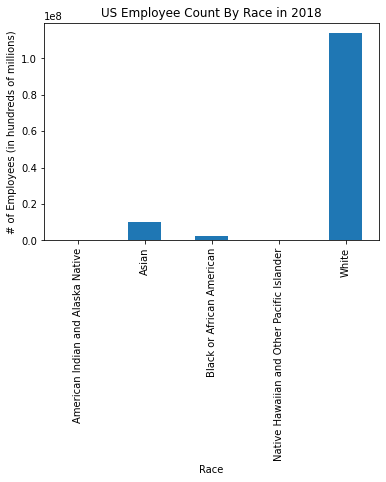

In [298]:
#Import pandas and matplotlib in order to create the visualizations for the data. Import numpy to handle particularly large values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Create a new data table using col_names and the data pulled from the Characteristics of Business api and assign it to df
df = pd.DataFrame(columns=col_names, data=r.json()[1:])
#Set the variable types for the variables "Employee_AMT_By_Firm", "Annual_Payroll", and "Revenue" to int (integers) using the numpy variable np for "Annual_Payroll" and "Revenue"
df["Employee_AMT_By_Firm"] = df["Employee_AMT_By_Firm"].astype(int)
df["Annual_Payroll"] = df["Annual_Payroll"].astype(np.int64)
df["Annual_Payroll"] = df["Annual_Payroll"] * 1000
df["Revenue"] = df["Revenue"].astype(np.int64)
#Use the columns for "Race" and "Employee_AMT_By_Firm" from the df table and to create a new table assigned to race_employed
race_employed = df[['Race','Employee_AMT_By_Firm']]
#Group the race_employed table by the "Race" column and get the summatoin values from the aggregated "Employee_AMT_By_Firm" column
race_employed = race_employed.groupby('Race')['Employee_AMT_By_Firm'].sum()
#Remove the 'Total', 'Minority', 'Nonminority', and 'Equally minority/nonminority' variables from race_employed 
race_employed = race_employed.drop(['Total', 'Minority', 'Nonminority', 'Equally minority/nonminority'])
#Print the race_employed table
print(race_employed)
#Create a bar graph using the data from race_employed and display the graph
ax = race_employed.plot(title = 'US Employee Count By Race in 2018',kind='bar')
ax.set_xlabel('Race')
ax.set_ylabel('# of Employees (in hundreds of millions)')
plt.show()

Race
American Indian and Alaska Native               16475163000
Asian                                          351600528000
Black or African American                       73878456000
Native Hawaiian and Other Pacific Islander       4247283000
White                                         5160208241000
Name: Annual_Payroll, dtype: int64


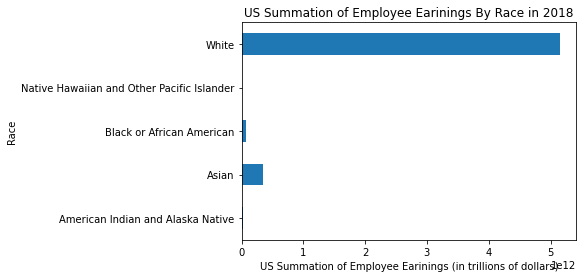

In [302]:
#Use the columns for "Race" and "Annual_Payroll" from the df table and to create a new table assigned to race_payroll
race_payroll = df[['Race','Annual_Payroll']]
#Group the race_payroll table by the "Race" column and get the summation values from the aggregated "Annual_Payroll" column
race_payroll = race_payroll.groupby('Race')['Annual_Payroll'].sum()
#Remove the 'Total', 'Minority', 'Nonminority', and 'Equally minority/nonminority' variables from race_payroll
race_payroll = race_payroll.drop(['Total', 'Minority', 'Nonminority', 'Equally minority/nonminority'])
#Print the race_payroll table
print(race_payroll)
#Create a horizontal bar graph using the data from race_payroll and display the graph
ax = race_payroll.plot(title = 'US Summation of Employee Earinings By Race in 2018',kind='barh')
ax.set_ylabel('Race')
ax.set_xlabel('US Summation of Employee Earinings (in trillions of dollars)')
plt.show()

In [300]:
#Use the columns for "Race", "Revenue_Desc" and "Employee_AMT_By_Firm" from the df table and to create a new table assigned to race_revenue
race_revenue = df[['Race', 'Revenue_Desc', 'Employee_AMT_By_Firm']]
#Group the race_revenue table by the "Race" and "Revenue_Desc" columns and get the summation values from the aggregated "Employee_AMT_By_Firm" column
race_revenue = race_revenue.groupby(['Race', 'Revenue_Desc'])['Employee_AMT_By_Firm'].sum()
#Remove all variables from race_revenue except the 'Minority' variable
race_revenue = race_revenue.drop(['Total', 'Nonminority', 'Equally minority/nonminority', 'American Indian and Alaska Native', 'Asian', 'Black or African American', 'Native Hawaiian and Other Pacific Islander', 'White'])
#Print the race_revenue table
print(race_revenue)

Race      Revenue_Desc                                     
Minority  All firms                                            9432081
          Firms with sales/receipts of $1,000,000 or more      6600106
          Firms with sales/receipts of $10,000 to $24,999        22234
          Firms with sales/receipts of $100,000 to $249,999     490432
          Firms with sales/receipts of $25,000 to $49,999        40714
          Firms with sales/receipts of $250,000 to $499,999     865638
          Firms with sales/receipts of $5,000 to $9,999           6823
          Firms with sales/receipts of $50,000 to $99,999       125490
          Firms with sales/receipts of $500,000 to $999,999    1269106
          Firms with sales/receipts of less than $5,000          11537
Name: Employee_AMT_By_Firm, dtype: int32


In [301]:
#Import the second vizualization package, altair
import altair as alt
#Using the "Revenue_Desc" column from the printed race_revenue table, create an ordered list of variables excluding the variable 'All firms' and assign it to 'category_name'. Re-define the names of the variables for easier reading
category_name = ['sales/receipts: $0-$5,000','sales/receipts: $5,000-$9,999','sales/receipts: $10,000-$24,999', 'sales/receipts: $25,000-$49,999', 'sales/receipts: $50,000-$99,999', 'sales/receipts: $100,000-$249,999', 'sales/receipts: $250,000-$499,999', 'sales/receipts: $500,000-$999,999', 'sales/receipts: $1,000,000+']
#Using the numerical values from the printed race_revenue table, create a list in which the values correspond to the variables in the category_name list as they do in the race_revenue table and assign it to 'amounts'
amounts = [11537, 6823, 22234, 40714, 125490, 490432, 865638, 1269106, 6600106]
#Create and print a dictionary (assigned to table) using the newly created lists to check that the variables and values are properly aligned. 
table = {category_name[i]: amounts[i] for i in range(len(category_name))}
print(table)
#Create a dataframe using the data from 'category_name' and 'amounts' and assign it to rr. Assign 'category_name' to 'Firm Revenue Amount' and 'amounts' to 'Average # of Minority Employees'
rr = pd.DataFrame({
    'Firm Revenue Amount': category_name,
    '# of Minority Employees': amounts
})
#Create a bar chart using the dataframe rr and set 'Firm Revenue Amount' as the x-values and 'Average # of Minority Employees' as the y-values
alt.Chart(rr).mark_bar().encode(
    x=alt.X('Firm Revenue Amount', sort=category_name),
    y='# of Minority Employees'
).properties(
    title='US # of Minority Employees By Firm Revenue in 2018'
)

{'sales/receipts: $0-$5,000': 11537, 'sales/receipts: $5,000-$9,999': 6823, 'sales/receipts: $10,000-$24,999': 22234, 'sales/receipts: $25,000-$49,999': 40714, 'sales/receipts: $50,000-$99,999': 125490, 'sales/receipts: $100,000-$249,999': 490432, 'sales/receipts: $250,000-$499,999': 865638, 'sales/receipts: $500,000-$999,999': 1269106, 'sales/receipts: $1,000,000+': 6600106}


alt.Chart(...)